<a href="https://colab.research.google.com/github/heroideallstar/data_alura/blob/main/avaliacao_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise das notas em geral
[Documentação pandas](https://pandas.pydata.org/docs/reference/io.html)

In [2]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ["usuarioId", "filmesId","nota", "momento"]
notas.head()

,usuarioId,filmesId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [7]:
print('Media', notas.nota.mean())
print('Mediana', notas.nota.median())

Media 3.501556983616962
Mediana 3.5


<Axes: ylabel='Frequency'>

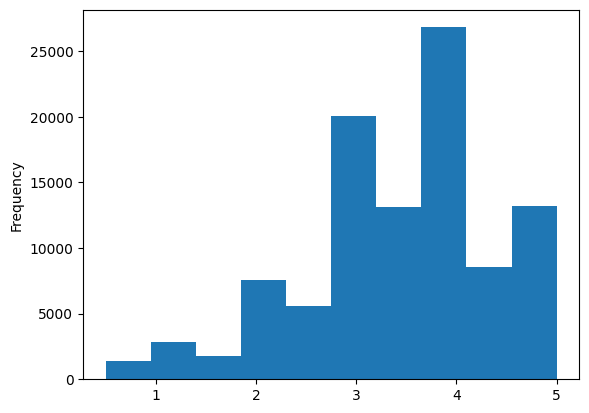

In [8]:
notas.nota.plot(kind='hist')

In [9]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

[Site Seaborn](https://seaborn.pydata.org/tutorial.html)

<Axes: ylabel='nota'>

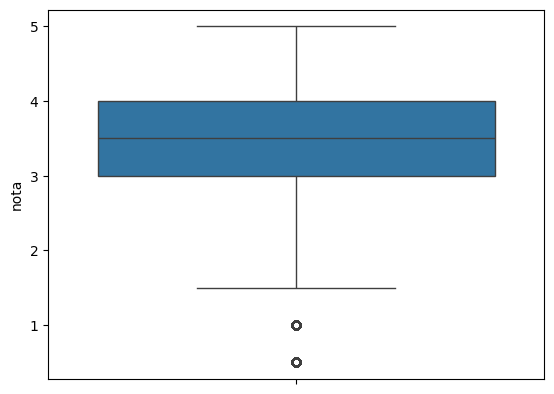

In [10]:
import seaborn as sns
sns.boxplot(notas.nota)

#Analise de filme a filme

In [11]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmesId","titulo", "generos"]
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
notas.query("filmesId == 1").nota.mean()

3.9209302325581397

In [13]:
medias_por_filme = notas.groupby("filmesId").mean().nota
medias_por_filme.head()

filmesId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

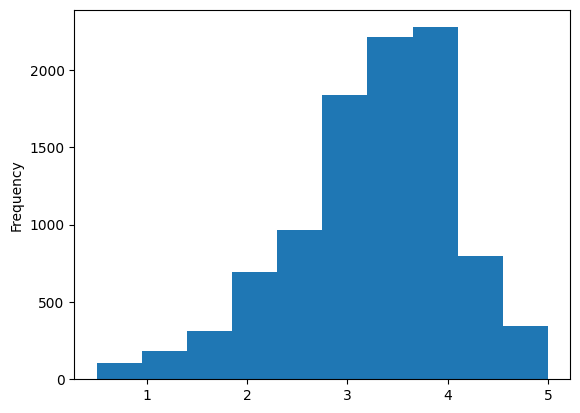

In [14]:
medias_por_filme.plot(kind = 'hist')

<Axes: ylabel='nota'>

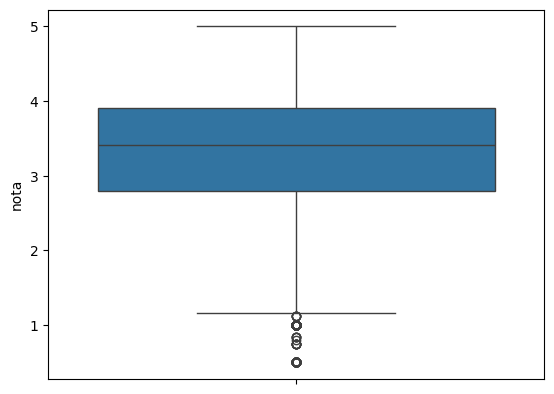

In [15]:
sns.boxplot(medias_por_filme)

In [16]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<ipython-input-17-e905c2b0ea08>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins = 10)


<Axes: xlabel='nota', ylabel='Density'>

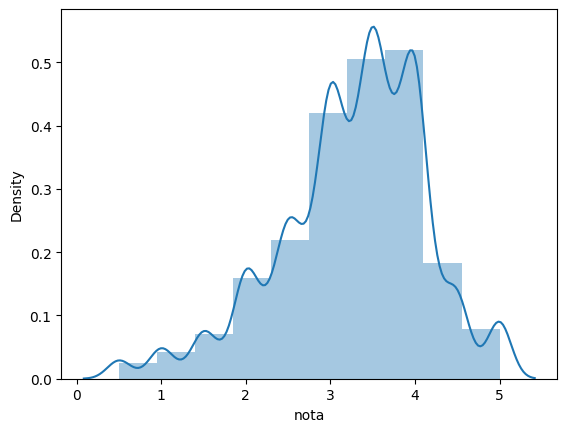

In [17]:
sns.distplot(medias_por_filme, bins = 10)

<Figure size 500x800 with 0 Axes>

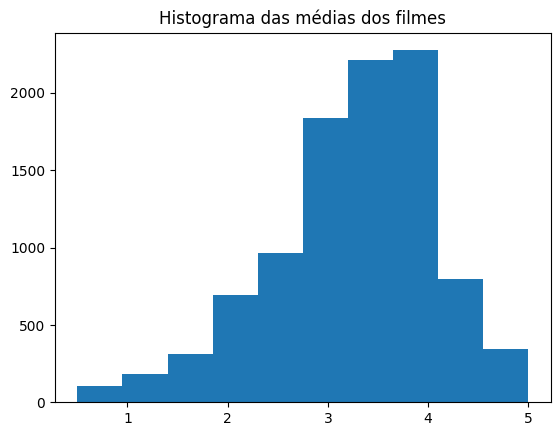

<Figure size 500x800 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")
plt.figure(figsize=(5,8))

#Comparação com as informaçoes do Kaggle
[Download](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

In [19]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [21]:
contagem_de_linguas = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ["lingua_original", "total"]
contagem_de_linguas.head()

,lingua_original,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='lingua_original', ylabel='total'>

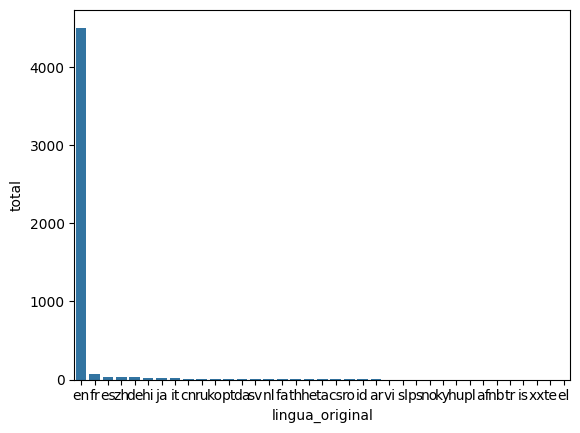

In [22]:
sns.barplot(x = 'lingua_original', y = 'total', data = contagem_de_linguas)

In [23]:
print(sns.__version__)

0.13.1


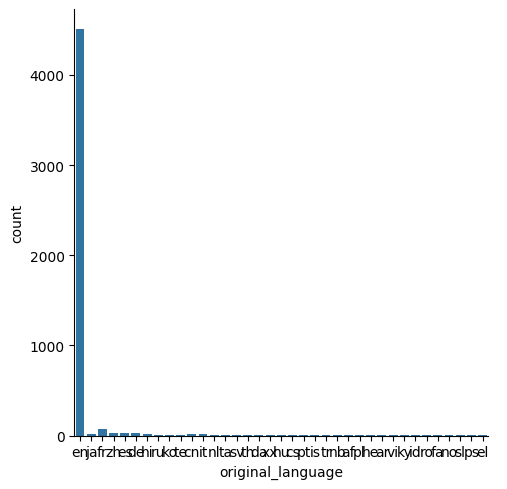

In [24]:
sns.catplot(x = 'original_language', kind ="count", data = tmdb)

([<matplotlib.patches.Wedge at 0x799304a987f0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

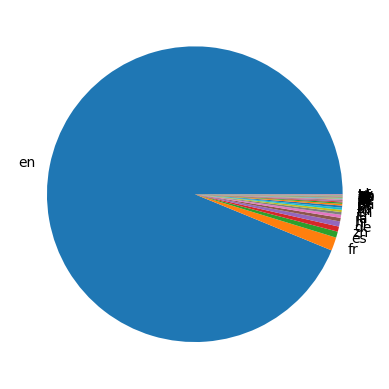

In [25]:
plt.pie(contagem_de_linguas["total"],labels = contagem_de_linguas['lingua_original'])

<Axes: xlabel='lingua', ylabel='total'>

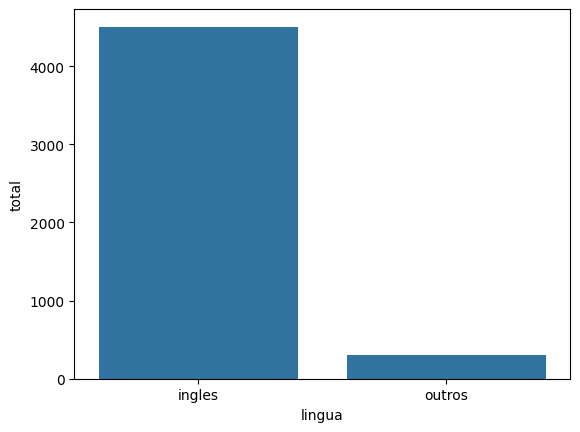

In [26]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_restante = total_geral - total_ingles
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles, total_restante]
}
pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data = dados)

In [39]:
total_por_lingua_diferente_do_ingles = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_diferente_do_ingles

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

<ipython-input-44-8eb465944522>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'original_language',


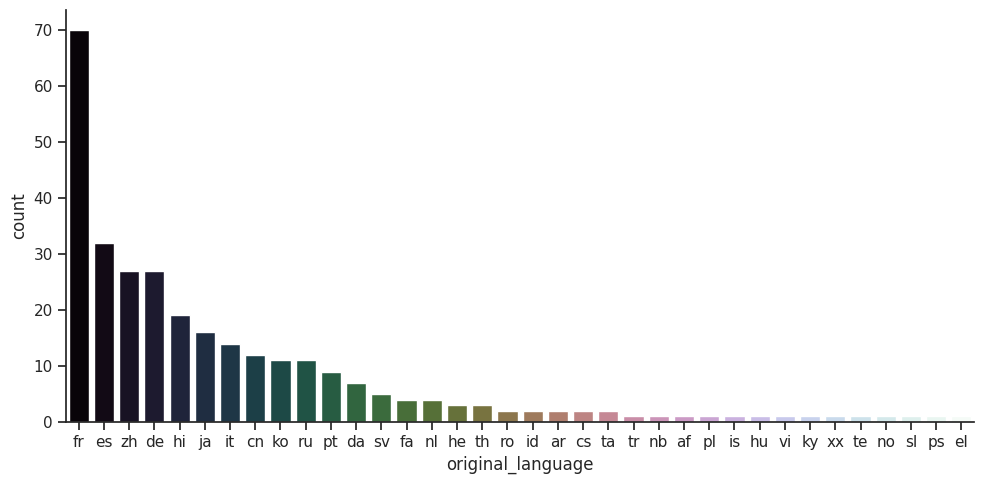

In [44]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = 'original_language',
            kind ="count",
            palette = "cubehelix",
            data = filmes_sem_lingua_original_em_ingles, aspect = 2,
            order = total_por_lingua_diferente_do_ingles.index)

#Analise dos dois primeiros filmes: Toystory e Jumanji

In [46]:
notas_toystory = notas.query("filmesId==1")
notas_jumanji = notas.query("filmesId==2")
print(len(notas_toystory),len(notas_jumanji))

215 110


In [67]:
print("Nota média do Toy Story %.2f" % notas_toystory.nota.mean())
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.mean())
print("Mediana das notas do Toy Story %.2f" % notas_toystory.nota.median())
print("Mediana das notas do Jumanji %.2f" % notas_jumanji.nota.median())
print("O desvio padrao das notas do Toy Story %.2f" % notas_toystory.nota.std())
print("O desvio padrao das notas do Jumanji %.2f" % notas_jumanji.nota.std())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43
Mediana das notas do Toy Story 4.00
Mediana das notas do Jumanji 3.50
O desvio padrao das notas do Toy Story 0.83
O desvio padrao das notas do Jumanji 0.88


In [54]:
import numpy as np

<Axes: xlabel='nota'>

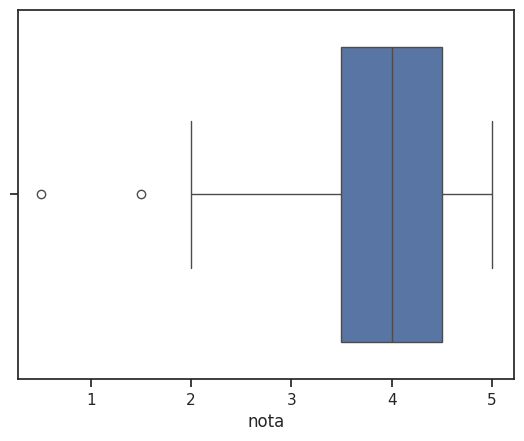

In [56]:
sns.boxplot(x = notas_toystory.nota)

<Axes: xlabel='nota'>

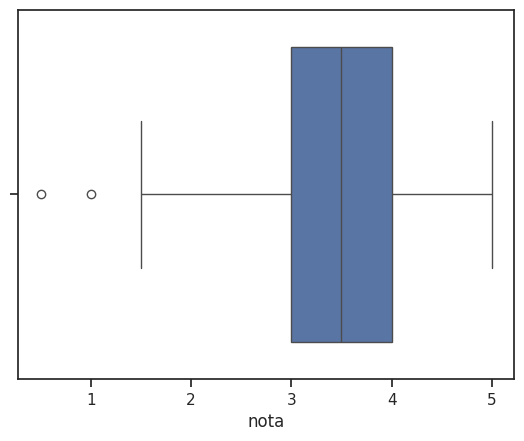

In [57]:
sns.boxplot(x = notas_jumanji.nota)

{'whiskers': [<matplotlib.lines.Line2D at 0x7993009dad40>,
 'caps': [<matplotlib.lines.Line2D at 0x7992f8305b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7993009d9a80>,
 'medians': [<matplotlib.lines.Line2D at 0x7992f8305690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7992f8306c20>,
 'means': []}

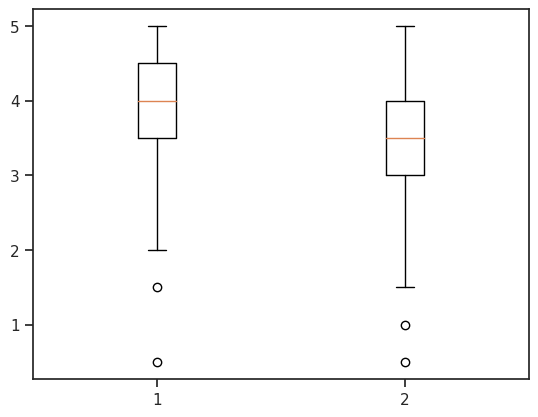

In [60]:
plt.boxplot([notas_toystory.nota,notas_jumanji.nota])

<Axes: xlabel='filmesId', ylabel='nota'>

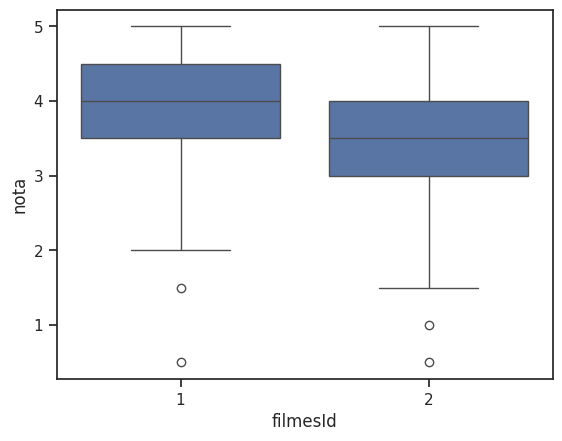

In [66]:
sns.boxplot(x = "filmesId", y= "nota", data = notas.query("filmesId in (1,2)"))